In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,execute,BasicAer

from qiskit.tools.visualization import plot_histogram

In [9]:
n = 16
s = 15
s =s % 2 **(n)

In [10]:
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
circ = QuantumCircuit(qr,cr)
barriers = True

for i in range(n):
    circ.h(qr[i])
    
if barriers:
    circ.barrier()

for i in range(n):
    if(s&(1<<i)):
        circ.z(qr[i])
    else:
        circ.iden(qr[i])

if barriers:
    circ.barrier()

for i in range(n):
    circ.h(qr[i])
    
if barriers:
    circ.barrier()

circ.measure(qr,cr)

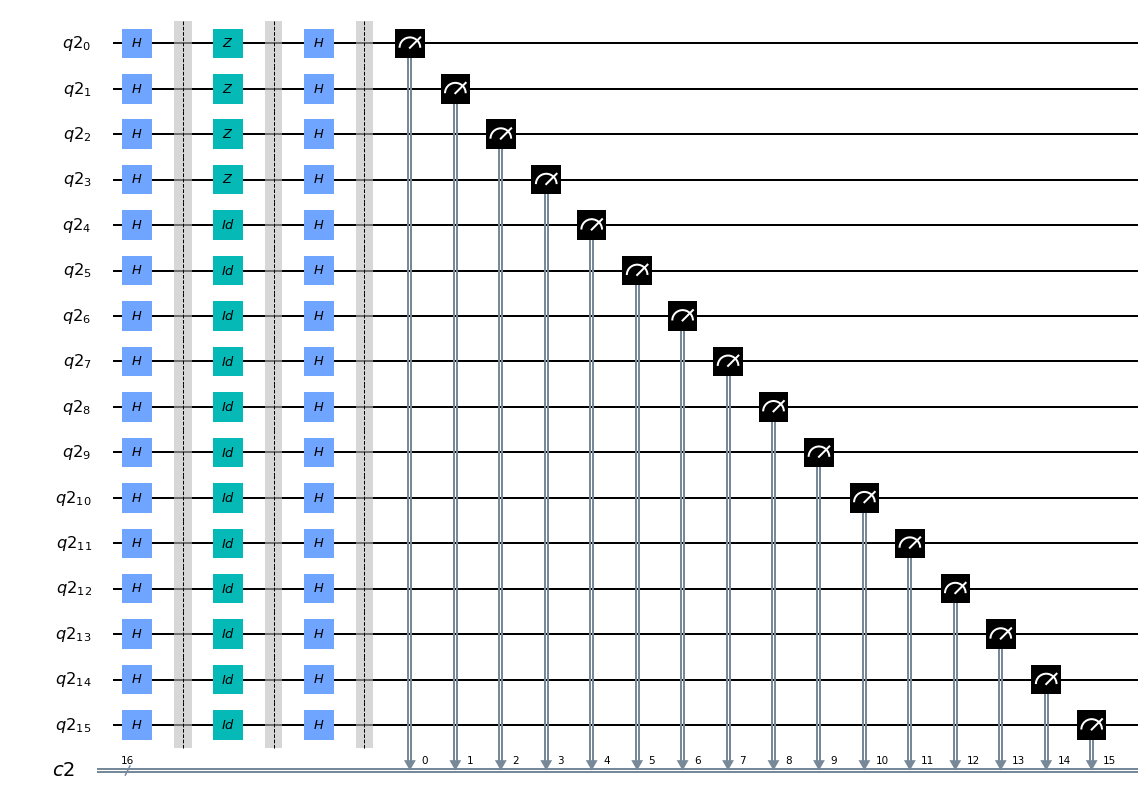

In [11]:
circ.draw(output='mpl')

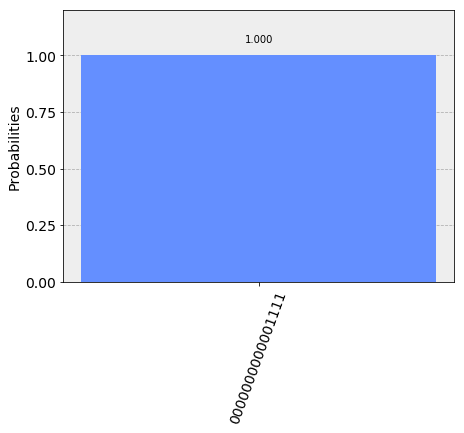

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circ,backend=backend,shots=1200).result()
plot_histogram(result.get_counts())